## Linked List

### Singly linked list

#### Overview
* Each node in a singly-linked list contains not only the value but also a reference field to link to the next node. By this way, the singly-linked list organizes all the nodes in a sequence.
* In most cases, we use the head node (the first node) to represent the whole list
* Access a random element
    + we are not able to access a random element in a singly-linked list in constant time.
    + If we want to get the ith element, we have to traverse from the head node one by one. 
    + It takes us O(N) time on average to visit an element by index, where N is the length of the linked list.
    
* Add operation
  + we can add a new node to a linked list if we know the node (prev) after which we want to insert
  + to add a new node at the begining, assing the curr.next to head, and then assign head to curr

* Delete operation
  + find the node before the node to delete (prev)
  + link prev.next to prev.next.next
  + to search and find the node to delete and its previous node, we need to traverse the linked list, which takes O(N)
  + to delete the first node from the list is simple: we just assign head to head.next

#### Leetcode 707. Design Linked List
* Overview
  + Design your implementation of the linked list. You can choose to use a singly or doubly linked list.
  + A node in a singly linked list should have two attributes: val and next. val is the value of the current node, and next is a pointer/reference to the next node.
  + If you want to use the doubly linked list, you will need one more attribute prev to indicate the previous node in the linked list. Assume all nodes in the linked list are 0-indexed.

  + Implement the MyLinkedList class:

    + MyLinkedList() Initializes the MyLinkedList object.
    + int get(int index) Get the value of the indexth node in the linked list. If the index is invalid, return -1.
    + void addAtHead(int val) Add a node of value val before the first element of the linked list. After the insertion, the new node will be the first node of the linked list.
    + void addAtTail(int val) Append a node of value val as the last element of the linked list.
    + void addAtIndex(int index, int val) Add a node of value val before the indexth node in the linked list. If index equals the length of the linked list, the node will be appended to the end of the linked list. If index is greater than the length, the node will not be inserted.
    + void deleteAtIndex(int index) Delete the indexth node in the linked list, if the index is valid.
    
* Algorithm
  + a typical linked list implementation
  + use two help function
    + getNode(self, index: int) -> Optional\[Node\] which returns the node at give index
    + getTail(self)-> Optional\[Node\] returns the tail node
  + get(self, index:int) -> int 
    + first, use getNode(index) to get the node, then return node.val if node else -1
  + addAtHead(self, val: int) -> None
    + we don't care if the curent head is None
    + node.next = self.head, and self.head = node 
  + addTail(self, val:int) -> None
    + first getTail, is tail is None, we have an empty list, call addAtHead(val)
    + if tail exists, set tail.next= node
  + addAtIndex(self, index:int, val:int) -> None
    + if index == 0, call addAtHead(val)
    + otherwise, get pre node by getNode(index-1)
      + if pre is None
      + otherwise, set node.next = pre.next and pre.next = node
  + deleteAtIndex(self, index:int) -> None
    + if index==0
      + if self.head is None, return, nothing to delete
      + otherwise, self.head = self.head.next
    + get pre node using getNode(index-1)
      + if pre or pre.next is None, nothing to delete, return
      + otherwise, pre.next=pre.next.next

In [2]:
from typing import Optional, List
class Node:
    def __init__(self, val: int = 0):
        self.val = val
        self.next = None
        
class MyLinkedList:

    def __init__(self):
        self.head = None
                
    # help function to return the node at given index 
    # if no node exists at index, return None
    # otherwise, return the node object
    def getNode(self, index:int) -> Optional[Node]:
        curr = self.head
        while curr and (index > 0):
            curr = curr.next
            index -= 1
        return curr    
    
    # help function to return the tail node where its next is None
    # if the list is empty (no head), return None
    def getTail(self) -> Optional[Node]:
        if not self.head:
            return None
        
        curr = self.head
        while curr.next:
            curr = curr.next
        return curr
    
    # use getNode to find the node object
    # if the node is None, return -1, else returns its value
    def get(self, index: int) -> int:
        node = self.getNode(index)
        return node.val if node else -1
        

    # set the node.next = self.head, and 
    # set self.head = node
    def addAtHead(self, val: int) -> None:
        node = Node(val)
        node.next = self.head
        self.head = node        

    # get the tail node, if tail is None, we have an empty list
    # then use addAtHead, otherwise, set the tail.next = node
    def addAtTail(self, val: int) -> None:
        
        tail = self.getTail()
        if not tail:
            self.addAtHead(val)
            return
        node = Node(val)
        tail.next = node
        

    # first check if index==0, then call addAtHead, otherwise
    # get the pre node at index-1, if pre is None, return
    # otherwise, set node.next=pre.next and pre.next=node
    def addAtIndex(self, index: int, val: int) -> None:
        if index == 0:
            self.addAtHead(val)
            return
        pre = self.getNode(index-1)
        if not pre:
            return
        node = Node(val)
        node.next = pre.next
        pre.next = node        

    # first check if index==0, if so if self.head is None, return
    # otherwise, set self.head = self.head.next
    # if index > 0, get pre node at index-1, if pre or pre.next is None, return
    # otherwise, pre.next = pre.next.next
    def deleteAtIndex(self, index: int) -> None:
        if index == 0:
            if not self.head:
                return
            self.head = self.head.next
        else:
            pre = self.getNode(index-1)
            if not pre or not pre.next:
                return
            pre.next = pre.next.next
        


# Your MyLinkedList object will be instantiated and called as such:
# obj = MyLinkedList()
# param_1 = obj.get(index)
# obj.addAtHead(val)
# obj.addAtTail(val)
# obj.addAtIndex(index,val)
# obj.deleteAtIndex(index)

### Two-pointer in Linked List
* to detect a cyclic linked list, we can use
  + hashmap to mark each node and traverse the list. If the same node is visited, return True
    + we don't care how the hash code is implemented, the same node object should have the same hash code
  + use fast and slow pointers to check if they point to the same node object  
  + for both methods, pointers will go to None without checking conditions return True

#### 141. Linked List Cycle
* Overview
  + Given head, the head of a linked list, determine if the linked list has a cycle in it.
  + There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to. Note that pos is not passed as a parameter.
  + Return true if there is a cycle in the linked list. Otherwise, return false.
* Algorithm
  + handle the edge cases of head is None or head.next is None
  + initialize fast = head.next.next and slow = head.next
  + in while fast and fast.next loop, 
    + move fast = fast.next.next, and slow = slow.next 
    + then check if fast == slow, if so, return True
  + if the code jumps out of the while loop, return False  

#### Leetcode 142. Linked List Cycle II
* Overview
  + Given the head of a linked list, return the node where the cycle begins. If there is no cycle, return null.
  + There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the next pointer. Internally, pos is used to denote the index of the node that tail's next pointer is connected to (0-indexed). It is -1 if there is no cycle. Note that pos is not passed as a parameter.
  + Do not modify the linked list.
* Algorithm
  + use fast and slow pointers
  + time complexity 
    + O(N)
  + space complexity
    + O(1)

In [4]:
# Definition for singly-linked list.
from typing import List, Optional

class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if head is None or head.next is None:
            return None
        
        fast = head.next.next
        slow = head.next
        
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next
            
            # if the list is cyclic, first make fast and slow overlap
            # then reset fast at head, and then move fast and slow 
            # at the same pace until they met at the entry point of the cycle
            if fast == slow:
                fast = head
                while fast != slow:
                    fast =fast.next
                    slow = slow.next
                return slow    
        
        # if fast or fast.next jumps out of the loop, the list is acyclic
        return None
        

#### 160. Intersection of Two Linked Lists
* Overview
  + Given the heads of two singly linked-lists headA and headB, return the node at which the two lists intersect. If the two linked lists have no intersection at all, return null.
  + For example, the following two linked lists begin to intersect at node c1:
  + Note that the linked lists must retain their original structure after the function returns.
  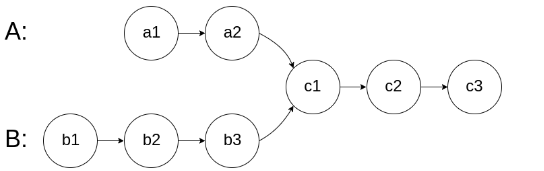
* Algorithm
  + if headA or headB is None, return None
  + set countA = countB = 0
  + set tmpA = headA and tmpB = headB, and move them synchronously if tmpA and tmpB
  + out of the while loop
    + if tmpA, continue to traverse listA, and start to increament count A
    + if tmpB, continue to traverse listB, and start to increament count B
  + one of countA and countB will be > 0, this is the extra number of nodes in the longer list
    + reset tmpA and tmpB to headA and headB, respectively
    + for \_ in countA, tmpA = tmpA.next
    + for \_ in countB, tmpB = tmpB.next
  + while tmpA and tmpB, if tmpA == tmpB, return tmpA
  + out of while loop, return None

In [5]:
# Definition for singly-linked list.
class ListNode:
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution:
    def getIntersectionNode(self, headA: ListNode, headB: ListNode) -> Optional[ListNode]:
        if headA is None or headB is None:
            return None
        
        tmpA, tmpB = headA, headB
        countA, countB = 0, 0
        
        while tmpA and tmpB:
            tmpA = tmpA.next
            tmpB = tmpB.next
            
        while tmpA:
            tmpA = tmpA.next
            countA += 1
            
        while tmpB:
            tmpB = tmpB.next
            countB += 1
            
        tmpA, tmpB = headA, headB
        
        for _ in range(countA):
            tmpA = tmpA.next
            
        for _ in range(countB):
            tmpB = tmpB.next
        
        while tmpA and tmpB:
            if tmpA == tmpB:
                return tmpA
            tmpA = tmpA.next
            tmpB = tmpB.next
        return None     
        